# Group Project

*By Hinal Jajal, Jinchen Yu, Ninette Simonian*

# Data Acquisition

In this section, we acquire the Palmer Penguins data and read it into Python.

In [3]:
#load data 
import pandas as pd
import numpy as np
import urllib
from matplotlib import pyplot as plt

url = "https://philchodrow.github.io/PIC16A/datasets/palmer_penguins.csv"
penguins = pd.read_csv(url)
penguins.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


# Exploratory Analysis

In this section, we explore the penguins dataset using summary tables and plots. We also include a subsection on  *Data Preparation*, in which we also split your data into a training and test set.

### Figure 1: Scatterplot of Culmen Length and Culmen Depth by Species 

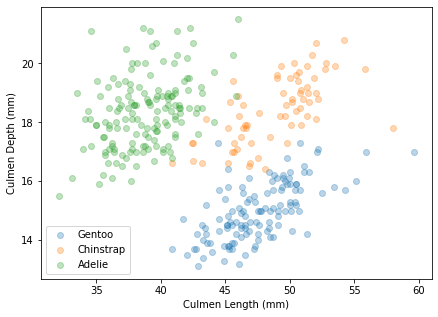

In [4]:
fig, ax = plt.subplots(1, figsize = (7,5))

# shorten the species name
penguins["Species"] = penguins["Species"].str.split().str.get(0)
my_set = set(penguins["Species"])

for x in my_set:
    mask = penguins["Species"]== x
    new_set = penguins[mask] 
    ax.scatter(new_set["Culmen Length (mm)"], new_set["Culmen Depth (mm)"], label = x, alpha = 0.3)
    
ax.set(xlabel = "Culmen Length (mm)", ylabel = "Culmen Depth (mm)")
ax.legend()

__Description:__ This scatter graph compares the culmen length (mm) and culmen depth (mm) of each species. We can see that the Adelie species have the shortest culmen lengths compared to the other species. The Gentoo species has shorter culmen depth compared to the other species. We can also see that each species can be obviously separated into three distinct sections on the graph. This informs us on whether culment length and culment depth could be possible predictor variables since they are shown to be grouped near and impacted by what species they are. 

### Figure 2: Scatterplot of Culmen Length and Culmen Depth by Species 

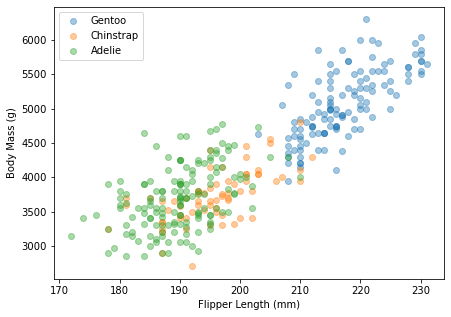

In [5]:
fig, ax = plt.subplots(1, figsize = (7,5))

# shorten the species name
penguins["Species"] = penguins["Species"].str.split().str.get(0)
my_set = set(penguins["Species"])

for x in my_set:
    mask = penguins["Species"]== x
    new_set = penguins[mask] 
    ax.scatter(new_set["Flipper Length (mm)"], new_set["Body Mass (g)"], label = x, alpha = 0.4)

ax.set(xlabel = "Flipper Length (mm)", ylabel = "Body Mass (g)")
ax.legend()

__Description:__ This scatter graph compares the flipper length (mm) and body mass (g) of each species. We can see that the Adelie species have the shortest flipper lengths compared to the other species and lightest body mass. The Gentoo species have the greatest flipper length, as well as body mass. We can see that Adelie and Chinstrap penguins have overlapping values, such that penguins for body species have very similar body mass and flipper length. This graph shows as that although Gentoo penguins are easily distinguishable based on flipper length and body mass, the same does not apply for Adelie and Chinstrap

### Figure 3: Each Bar Graph corresponds to a distinct Island that the Species resides on - looking at Body Mass based on Sex

""


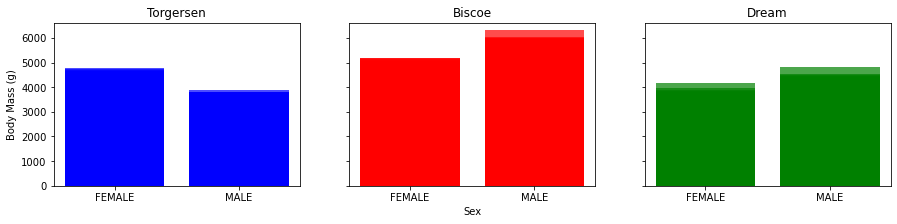

In [6]:
p = penguins.copy() # make a copy of penguins, then make changes to new dataframe 
p = p[["Species", "Island", "Sex", "Body Mass (g)"]]
p = p.dropna() # remove Nans
p = p[p["Sex"] !="."]

#create dict for distinct colors according to island 
colors = {
    "Torgersen": "Blue", 
    "Biscoe": "Red",
    "Dream": "Green"
}

ac = {
    "Torgersen": 0,
    "Biscoe": 1,
    "Dream": 2,
}

fig, ax = plt.subplots(1, 3, sharey = True, figsize = (15,3), sharex = True)

df = p.groupby('Species') 

def bar(df, col1,col2, **kwargs):
    '''
    input a data frame (with Species) and make bar graph on axis [] 
    '''
    island = df['Island'].iloc[0] #first entry
    #plot based on which continent the country is in 
    ax[ac[island]].bar(df[col1], df[col2], color = colors[island], **kwargs )
    ax[ac[island]].set_title(island)
    
ax[0].set_ylabel("Body Mass (g)")
ax[1].set_xlabel("Sex")
df.apply(bar, 'Sex', 'Body Mass (g)', alpha = 0.7)


__Description__: This bar graph looks at which island each species resides on and identifies their body mass according to sex. This bar graph is useful because it groups by Island as well as Sex, two qualitative variables. We can see that not only does a difference exist between islands, but also between the two sexes. For example, we can see that the species on Biscoe have the largest average body mass. This informs us that either island or sex may be good predictor variables. 

### Figure 4: Each scatterplot corresponds to a distinct island that the species resides on - looking at Flipper Length and Body Mass

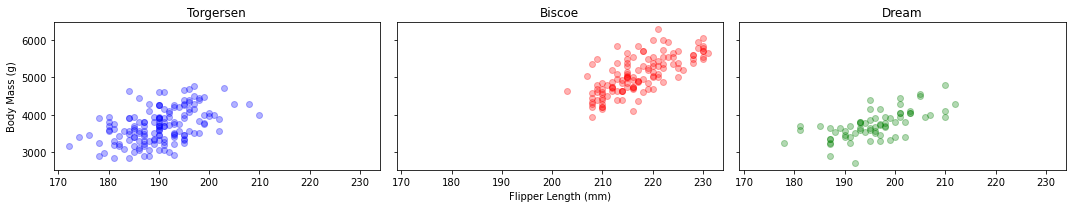

In [7]:
colors = {
    "Torgersen": "Blue", 
    "Biscoe": "Red",
    "Dream": "Green"
}

ac = {
    "Torgersen": 0,
    "Biscoe": 1,
    "Dream": 2,
}

fig, ax = plt.subplots(1, 3, sharey = True, figsize = (15,3), sharex = True)

df = penguins.groupby('Species') 

def scatter(df, col1,col2, **kwargs):
    '''
    input a data frame (with Species) and make line plot on axis [] 
    '''
    island = df['Island'].iloc[0] #first entry
    #plot based on which continent the country is in 
    ax[ac[island]].scatter(df[col1], df[col2], color = colors[island], **kwargs )
    ax[ac[island]].set_title(island)
    #ax[ac[island]].set_xlabel("Flipper Length (mm)")
    
ax[0].set_ylabel("Body Mass (g)")
ax[1].set_xlabel("Flipper Length (mm)")
df.apply(scatter, 'Flipper Length (mm)', 'Body Mass (g)', alpha = 0.3)
plt.tight_layout()

__Description:__ These scatter plots look at which island each species resides on and identifies their body mass according to flipper length (mm). Looking further into which island the species resides on, we evaluate the relationship between two quantitative variables (length and mass). We can see that on average, a penguins flipper length generally increases as body mass increases. For example, penguins residing on on Biscoe have longer flipper lengths and greater body mass compared to penguins on the other islands. These graphs show us that flipper length and body mass may be good indicators of a species, when also including island as a predictor variable. 

### Figure 5: Each scatterplot corresponds to a distinct island that the species resides on - looking at Culmen Depth and Culmen Length

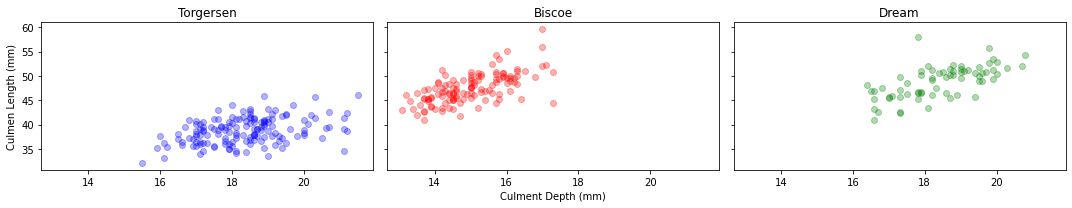

In [8]:
colors = {
    "Torgersen": "Blue", 
    "Biscoe": "Red",
    "Dream": "Green"
}

ac = {
    "Torgersen": 0,
    "Biscoe": 1,
    "Dream": 2,
}

fig, ax = plt.subplots(1, 3, sharey = True, figsize = (15,3), sharex = True)

df = penguins.groupby('Species') 

def scatter(df, col1,col2, **kwargs):
    '''
    input a data frame (with Species) and make line plot on axis [] 
    '''
    island = df['Island'].iloc[0] #first entry
    #plot based on which continent the country is in 
    ax[ac[island]].scatter(df[col1], df[col2], color = colors[island], **kwargs )
    ax[ac[island]].set_title(island)
   # ax[ac[island]].set_xlabel("Culmen Depth (mm)")
    
ax[0].set_ylabel("Culmen Length (mm)")
ax[1].set_xlabel("Culment Depth (mm)")
df.apply(scatter, 'Culmen Depth (mm)', 'Culmen Length (mm)', alpha = 0.3)
plt.tight_layout()

__Description:__ These scatter plots look at which island each species resides on and identifies their culmen length (mm) according to culmen depth (mm). We can see that on average, the species residing on Torgersen have shorter culmen lengths compared to the other islands. Species on Biscoe have shorter culmen depths, while species on Dream have the greater culmen lengths and depth. 

### Summary Tables:
Looking at the average measurements of all the species and separating them based on sex. 

In [9]:
def penguin_summary_table(group_cols, value_cols):
    df = penguins.groupby(group_cols)[value_cols].mean().round(2)
    print(df)   

In [10]:
penguins = penguins[penguins["Sex"] !="."]
penguin_summary_table(["Sex", "Species"], ["Culmen Length (mm)", "Culmen Depth (mm)",
                                           "Body Mass (g)", "Flipper Length (mm)"])

                  Culmen Length (mm)  Culmen Depth (mm)  Body Mass (g)  \
Sex    Species                                                           
FEMALE Adelie                  37.26              17.62        3368.84   
       Chinstrap               46.57              17.59        3527.21   
       Gentoo                  45.56              14.24        4679.74   
MALE   Adelie                  40.39              19.07        4043.49   
       Chinstrap               51.09              19.25        3938.97   
       Gentoo                  49.47              15.72        5484.84   

                  Flipper Length (mm)  
Sex    Species                         
FEMALE Adelie                  187.79  
       Chinstrap               191.74  
       Gentoo                  212.71  
MALE   Adelie                  192.41  
       Chinstrap               199.91  
       Gentoo                  221.54  


 __Description__: This summary table breaks down our possible predictor variables by another qualitative predictor variable (Sex). All males pengiuns (regardless of species) have longer Culmen length, Culmen Depth, Flipper Length, as well as Body Mass (on average) compared to female pengiuns. Therefore, we can see that males have higher numbers for every category compared to females. Between species, although Gentoos seem to have significantly longer Flipper Lengths, Flipper Length seems to be the least varying category. Body Mass also does not show a great difference for Chinstrap between females and males. This summary table supports what we saw in the graphs. 

## Data Preparation
In this section, we break our data into two parts each -a training set and a testing set. We will feed the training set into the classification algorithm to form a trained model. Once the model is formed, we will use it to classify the testing set, allowing us to determine the accuracy of the model. Here we have have made a 20 /80 split, such that 80% of the data set will be used for training and 20% will be used for testing.

### Split Data 

In [11]:
# split data into training and test data (80/20% of the rows).
from sklearn.model_selection import train_test_split
#Make sure random values that code generates is same every time code runs
np.random.seed(1234)
train,test=train_test_split(penguins,test_size=.2)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274 entries, 224 to 303
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            274 non-null    object 
 1   Sample Number        274 non-null    int64  
 2   Species              274 non-null    object 
 3   Region               274 non-null    object 
 4   Island               274 non-null    object 
 5   Stage                274 non-null    object 
 6   Individual ID        274 non-null    object 
 7   Clutch Completion    274 non-null    object 
 8   Date Egg             274 non-null    object 
 9   Culmen Length (mm)   272 non-null    float64
 10  Culmen Depth (mm)    272 non-null    float64
 11  Flipper Length (mm)  272 non-null    float64
 12  Body Mass (g)        272 non-null    float64
 13  Sex                  265 non-null    object 
 14  Delta 15 N (o/oo)    262 non-null    float64
 15  Delta 13 C (o/oo)    263 non-null    f

### Preprocessing Data

In this section, we clean and transform the data.

Before we can feed our data set into a machine learning algorithm, we have to remove missing values and split it into training and test sets.

If we perform a count of each column, we will see that much of the data on certain fields is missing. Most machine learning algorithms will have a difficult time handling missing values, so we will need to make sure that each row has a value for each column.

In [12]:
penguins.count()

studyName              343
Sample Number          343
Species                343
Region                 343
Island                 343
Stage                  343
Individual ID          343
Clutch Completion      343
Date Egg               343
Culmen Length (mm)     341
Culmen Depth (mm)      341
Flipper Length (mm)    341
Body Mass (g)          341
Sex                    333
Delta 15 N (o/oo)      329
Delta 13 C (o/oo)      330
Comments                26
dtype: int64

__Discussion:__ Most of the rows are missing values for “comments”, so we will remove “comments” column from the data frame. Also, we will drop some columns that would not contribute to our data analysis, including "studyName,sample Number,Individual ID, Clutch completion, Date egg". As a result, we remain "Species", "Island", "Culmen Length (mm)", "Culmen Depth (mm)", "Flipper Length (mm)", "Body Mass (g)", "Sex","Delta 15 N (o/oo)", "Delta 13 C (o/oo)" as our variables. For easy reading, we shorten some names of columns. Some rows have nonsense value, like "." in the “Sex” field; here we fill the nonsense Value with “NA”. Then we drop all of missing Value of our selected columns. Now we need to format the remaining data in a way that our machine learning algorithms will accept.The “Species” and “Sex” and "Island" fields are both string values that correspond to categories. so we will run each through a preprocessor. This preprocessor will convert these strings into integer keys, making it easier for the classification algorithms to find patterns. For instance, “Female” and “Male” will be converted to 0 and 1 respectively. The name of each category of "Species" and "Island" will be recoded to 0, 1, 2.

In [21]:
# clean and transform data.

from sklearn import preprocessing

def prep_penguins_data(data):
    df = data.copy()
    # restrict tensions to specific columns 
    cols=["Species", "Island", "Culmen Length (mm)", "Culmen Depth (mm)", "Flipper Length (mm)", "Body Mass (g)", "Sex"]
    df=df[cols]

    # shorten columns names for easy reading
    df["Species"]=df["Species"].str.split().str.get(0)
    df["C_Length"]=df["Culmen Length (mm)"]
    df["C_Depth"]=df["Culmen Depth (mm)"]
    df["F_Length"]=df["Flipper Length (mm)"]
    df["Mass"]=df["Body Mass (g)"]
    change_labels = ["Culmen Depth (mm)","Culmen Length (mm)","Flipper Length (mm)","Body Mass (g)" ]
    df = df.drop(change_labels, axis=1)

    # recode 'Sex' column
    recode={
        "MALE":1,
        "FEMALE":0,
        ".": np.nan
    }

    df["Sex"]=df["Sex"].map(recode)
    
    # remove Nans
    df = df.dropna()
    
    #change Species to numbers
    le = preprocessing.LabelEncoder()
    df['Species'] = le.fit_transform(df['Species'])
    df['Island'] = le.fit_transform(df['Island'])
    
    # split into X and y,“X” containing all of the values for each row besides “Species”, 
    # “y” containing only the “Species” value for that row.
    X=df.drop(['Species'],axis=1)
    y=df['Species']
    
    return (X,y)

### Break X, y into training set and a testing set.
Next, we apply the preprocessing function to clean and transform our train and test data set. Then we break the “X” and “y” array into training set and a testing set for modeling.

In [22]:
# apply preprocessing function to our train and test data
# separate “X” and “y”  into training and testing set.
X_train, y_train= prep_penguins_data(train)
X_test, y_test = prep_penguins_data(test)

# Modeling

In this section, we build several machine learning models. For each model, we demonstrate the use of cross-validation to obtain optimal model complexity parameters. The aim is to present a model with high prediction accuracy (on unseen test data) that uses *a minimal number of columns from the original data set*. 

## Multinomial Logistic Regression:
The first machine learning model we try is the multinomial logistic regression.

### Feature Selection by Cross-validation:

In this section, we will use cross-validation to intelligently and automatically choose the most relevant columns (features) in the data for our model. This process is called feature selection. Also, we'll take a quick look at how feature selection can improve model performance.

Cross-validation is a highly efficient tool for estimating the feature selection of a model. The idea of k-fold cross validation is to take a small piece of our training data, say 20%, and use that as a mini test set. We train the model on the remaining 80%, and then evaluate on the 20%. We then take a different 20%, train on the remaining 20%, and so on. We do this many times, and finally average the results to get an overall average picture of how the model might be expected to perform on the real test set.



In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

def check_column_score(cols,deb=False):
    """
    Trains and evaluates multinomial logistic regression model via cross validation 
    on the columns of the data with selected indeces
    """
    #Creates the multinomial logistic regression model
    LR = LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg', max_iter = 100000)  
    if deb:
        print("training with columns" + str(cols))
    
    return cross_val_score(LR,X_train[cols],y_train,cv=5).mean()


In [24]:
# select the best feature combination.

def best_feature_selection(combos,deb=False):
    """
    select the best feature combination.
    Pararmeter:
    combos: list of the features.
    deb: boolean. control if you wanna print the candidate feature combinations.
    Return: list of the best combination of features.
    """
    best_score = -np.inf
    best_combo =[]
    for combo in combos:
        #x is the cross val score with the particular combinations
        x=check_column_score(combo)
        if deb:
            print("CV score is "+ str(np.round(x,3)))
        #Finds the maximum cross val score
        if x > best_score:
            best_score= x
            best_combo = combo
    return best_combo

In [25]:
# apply best_feature_selection function to the candidate feature combinations and print out the result.
#The model prints some warnings that we can ignore, so we suppress them. 
import warnings
warnings.filterwarnings("ignore")

#Possible combinations of features
combos = [['Sex', 'C_Length', 'C_Depth'],
          ['Sex', 'Mass', 'F_Length'],
          ['Sex', 'F_Length', 'C_Length'],
          ['Island', 'C_Length','C_Depth'],
          ['Island', 'Mass', 'F_Length']]

best_cols=best_feature_selection(combos)
print("The best feature selection is:", best_cols)

The best feature selection is: ['Sex', 'C_Length', 'C_Depth']


### Estimate Optimal Model Complexity
In this section, we use cross-validation to estimate optimal model complexity. The same idea we used to find out the best feature selection. Cross-validation helps us to choose the optimal complexity, that is to say, the optimal complexity depth.

In [26]:
def complexity_LR(N):
    """
    estimate optimal complexity of the logistic regression model.
    Parameters: N. the maximum number for complexity.
    Return : a plot shows the cross val scores for different complexities.
             Prints the cross val score for each complexity level.
    """
    #Creates an empty array of size N 
    cv=np.zeros(N)
    #Creates an array of size N with numbers in the range (1,N+1)
    depths=np.arange(1,N+1)
    
    for d in range(1, N+1):
        #Creates the multinomial regression model 
        LR = LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg', max_iter = 1000,C=d)  
        #Fits the model to the training data 
        LR.fit(X_train, y_train)
        #Sets each entry of the array to be the cross val score for the corresponding complexity
        cv[d-1]=cross_val_score(LR,X_train[best_cols],y_train,cv=5).mean()

    fig, ax = plt.subplots(1, figsize = (10, 7))
    #Creates a scatterplot of the cross val scores 
    ax.scatter(depths,cv,color="black",label="Cross Val Score")
    #Sets the label
    ax.set(xlabel = "Complexity (depth)", ylabel = "Performance (score)",ylim=(cv.min()-0.02,1))
    ax.legend()
    print(list(zip(range(1,N),cv.round(3))))

[(1, 0.989), (2, 0.989), (3, 0.989), (4, 0.989), (5, 0.989), (6, 0.989), (7, 0.989), (8, 0.989), (9, 0.989), (10, 0.989), (11, 0.992), (12, 0.992), (13, 0.992), (14, 0.992), (15, 0.992), (16, 0.992), (17, 0.992), (18, 0.992), (19, 0.992)]


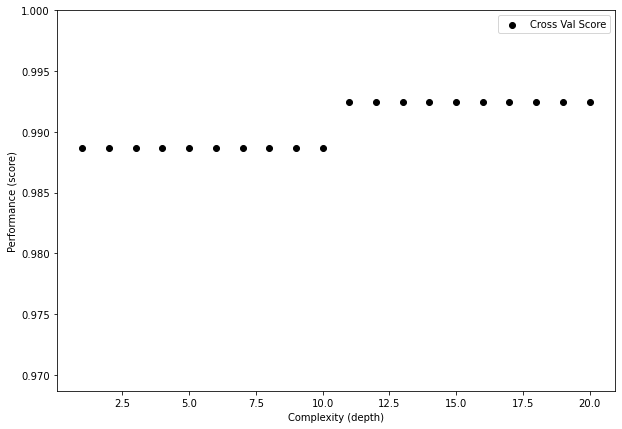

In [27]:
complexity_LR(20)

__Interpretation of Results__: The optimal complexity ranges between 0.989 and 0.992, which would not make much of a difference in our opinion. So, we have chosen to go with the default complexity level.

### Evaluate Model:

In this section, we evaluate our model based on the feature selection.

In [28]:
#We print the accuracy score for the model on the training set and the testing set.
X_train_select = X_train[best_cols]
X_test_select = X_test[best_cols]
LR = LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg', max_iter = 100000, C = 6)  
LR.fit(X_train_select, y_train)
LR_train = LR.score(X_train_select,y_train)
LR_test = LR.score(X_test_select,y_test)
print("The train score is " + str(LR_train)+ " and the test score is " + str(LR_test))

The train score is 1.0 and the test score is 0.9705882352941176


The model is pretty accurate and there isn't a significant difference between the train set and the test score, so it does not seem to overfit or underfit the data either.

### Inspect Instances
Here we inspect few instances in which our trained model gave the wrong answer on the test set. Thus, we fit the model on the test set, as well as the training set.

In [29]:
from sklearn.metrics import confusion_matrix
#test data mistakes
y_test_pred = LR.predict(X_test_select)
c=confusion_matrix(y_test,y_test_pred)
c

array([[32,  1,  0],
       [ 1, 14,  0],
       [ 0,  0, 20]])

In [30]:
#training data mistakes
y_train_pred = LR.predict(X_train_select)
c=confusion_matrix(y_train,y_train_pred)
c

array([[113,   0,   0],
       [  0,  53,   0],
       [  0,   0,  99]])

In [31]:
# use booolean indexing to extract all the incorrectly classified species 

#mask = mistake 
mask = y_test != y_test_pred
mistakes = X_test[mask]
mistake_labels = y_test[mask].to_numpy()
mistake_preds = y_test_pred[mask]
m_len = len(mistakes)
m_len # print how many mistakes we made 

2

In [32]:
mistakes

,Island,Sex,C_Length,C_Depth,F_Length,Mass
182,1,0.0,40.9,16.6,187.0,3200.0
73,2,1.0,45.8,18.9,197.0,4150.0


In [33]:
print(mistake_labels,mistake_preds)

species = {0:'Adelie', 1:'Chinstrap', 2: 'Gentoo'}

for i in range(m_len):
    print("The predicted species was " + species[mistake_preds[i]]+" but the true species was "+species[mistake_labels[i]])

[1 0] [0 1]
The predicted species was Adelie but the true species was Chinstrap
The predicted species was Chinstrap but the true species was Adelie


In [34]:
penguins.groupby('Species').mean()

,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
Species,,,,,,,
Adelie,76.500000,38.791391,18.346358,189.953642,3700.662252,8.859733,-25.804194
Chinstrap,34.500000,48.833824,18.420588,195.823529,3733.088235,9.356155,-24.546542
Gentoo,62.056911,47.529508,14.976230,217.188525,5077.663934,8.247026,-26.185305


__Interpretation of results__: We see that the model incorrectly predicted a Chinstrap penguin as an Adelie penguin. Since culmen length was one of the features we selected, the confusion is probably because the penguin's culmen length was significantly lower than the mean culmen length of Chinstrap penguins. Its culmen length was 40.9 mm, which is much closer to the mean culmen length of Adelie penguins, 38.79 mm.
Then, we see that the model predicted an Adelie penguin as a Chinstrap penguin. This is probably because the penguin's culmen length is quite high at 45.8mm. This is closer to the mean culmen length of Chinstrap penguins (48.8mm) than that of Adelie penguins (38.8mm). 

### Plot the decision regions
Create a separate plot for each possible value of the qualitative predictor variable that we selected. We chose Island as our qualitative variable, so we show some plots, with the decision regions for Different island separately. 

In [35]:
# Plot the decision regions of a classifer

def plot_regions(c,X,y,title):
    """
    Plot the decision regions of a classifer
    c: the Support vector classifiers 
    X: the preditor variables
       this function is for the penguins dataset
       uses columns culmen length /depth
    y: the target variables
    """
    x0=X['C_Length']
    x1=X['C_Depth']

    c.fit(X,y)
    
    #create a grid
    grid_x=np.linspace(x0.min(),x0.max(),501)
    grid_y=np.linspace(x1.min(),x1.max(),501)
    xx,yy=np.meshgrid(grid_x,grid_y) #has 501x501
    #xx[i,j]=i-th entry of x_grid
    #yy[i,j]-j-th entry of y_grid
    
    
    #machine learning algorithms want us to have a 1d array
    XX=xx.ravel()
    YY=yy.ravel()
    p=c.predict(np.c_[XX,YY])

    #now reshape p into a 2D array
    p=p.reshape(xx.shape)

    fig,ax=plt.subplots(1)
    #plot decision regions
    ax.contourf(xx,yy,p,cmap="jet",alpha=.2)

    #plot data
    ax.scatter(x0,x1,c=y,cmap="jet")
    
    ax.set(title = title, xlabel="Culmen Length (mm)",ylabel="Culmen Depth (mm)")

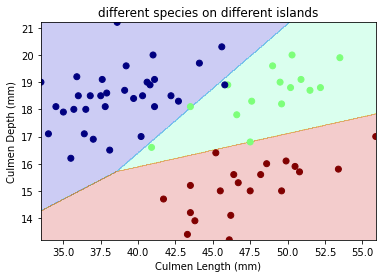

In [36]:
X_t=X_test_select[['C_Length', 'C_Depth']]
y = y_test
LR = LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg', max_iter = 100000, C = 6)  
plot_regions(LR,X_t,y,"different species on different islands")

__Interpretation of results:__ We see that the model predicted a blue dot as being a green dot incorrectly. This was probably because it was very close to the border.

## Decision trees
Here we build a model that predicts the species of a penguin based on the other features in the penguins dataframe. A decision tree examines one variable at a time, and splits into one of two branches based on the result of that value, at which point it does the same for the next variable.

### Feature Selection by Cross-validation:

In [38]:
# use cross-validation to estimate the predictive performance of Decision Tree Classifier 
from sklearn import tree, preprocessing
from sklearn.model_selection import cross_val_score

def check_column_score(cols,deb=False):
    """
    Trains and evaluates Decision Tree Classifier model via cross validation 
    on the columns of the data with selected indeces
    """
    tree_model = tree.DecisionTreeClassifier()
    if deb:
        print("training with columns" + str(cols))
    
    return cross_val_score(tree_model,X_train[cols],y_train,cv=5).mean()


In [39]:
# select the best feature combination.

def best_feature_selection(combos,deb=False):
    """
    select the best feature combination.
    Pararmeter:
    combos: list of the features.
    deb: boolean. control if you wanna print the candidate feature combinations.
    Return: list of the best combination of features.
    
    """
    best_score = -np.inf
    best_combo =[]
    for combo in combos:
        x=check_column_score(combo)
        if deb:
            print("CV score is "+ str(np.round(x,3)))
        if x > best_score:
            best_score= x
            best_combo = combo
    return best_combo

In [40]:
# apply best_feature_selection function to the candidate feature combinations and print out the result.

combos = [['Sex', 'C_Length', 'C_Depth'],
          ['Sex', 'Mass', 'F_Length'],
          ['Sex', 'F_Length', 'C_Length'],
          ['Island', 'C_Length','C_Depth'],
          ['Island', 'Mass', 'F_Length']]

print("The best feature selection is:", best_feature_selection(combos))


The best feature selection is: ['Island', 'C_Length', 'C_Depth']


### Estimate Optimal Model Complexity
In this section, we use cross-validation to estimate optimal model complexity (optimal tree depth). The same idea we used to find out the best feature selection. Cross-validation helps us to choose the optimal complexity, that is to say, the optimal tree depth.

In [41]:
# the function to estimate optimal complexity of the model.

def complexity_D(N):
    """
    estimate optimal complexity of the logistic regression model.
    Parameters: N. the maximum number for complexity.
    Return : a plot shows the cross val scores for different complexities.
             Prints the cross val score for each complexity level.
    """
    #Creates an empty array of size N 
    cv=np.zeros(N)
    #Creates an array of size N with numbers in the range (1,N+1)
    depths=np.arange(1,N+1)
    
    for d in range(1, N):
        #Creates the decision tree 
        T = tree.DecisionTreeClassifier(max_depth=d)  
        #Fits the model to the training data 
        T.fit(X_train, y_train)
        #Sets each entry of the array to be the cross val score for the corresponding complexity
        cv[d-1]=cross_val_score(T,X_train[best_cols],y_train,cv=5).mean()

    fig, ax = plt.subplots(1, figsize = (10, 7))
    #Creates a scatterplot of the cross val scores 
    ax.scatter(depths,cv,color="black",label="Cross Val Score")
    #Sets the label
    ax.set(xlabel = "Complexity (depth)", ylabel = "Performance (score)",ylim=(.73,1))
    ax.legend()
    print(list(zip(range(1,N),cv.round(3))))

[(1, 0.751), (2, 0.932), (3, 0.936), (4, 0.951), (5, 0.974), (6, 0.981), (7, 0.981), (8, 0.981), (9, 0.981), (10, 0.981), (11, 0.981), (12, 0.981), (13, 0.981), (14, 0.981), (15, 0.981), (16, 0.981), (17, 0.981), (18, 0.981), (19, 0.981)]


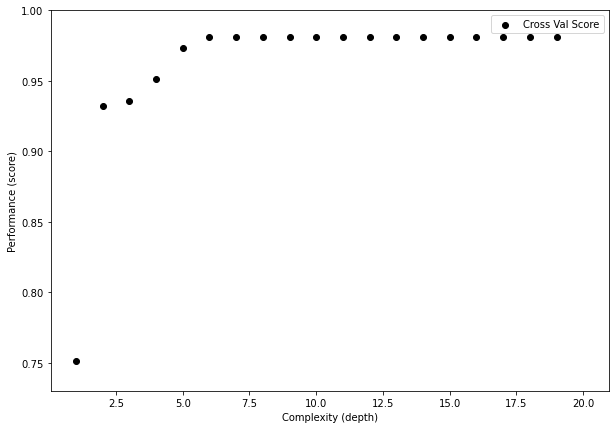

In [42]:
# apply the optimal_complexity function use N=20

complexity_D(20)

__Interpretation of Result:__ the degree of optimal complexity might be 7 because it has the highest train score and the lowest difference between the train score and the test score.

### Evaluate model on the test set
In this section, we evaluate our model based on the feature selection and best depth specified above.

In [43]:
best_feature_selection(combos)
X_train_select = X_train[best_feature_selection(combos)]
X_test_select = X_test[best_feature_selection(combos)]
T= tree.DecisionTreeClassifier(max_depth=7)
T.fit(X_train_select, y_train)
tree_train = T.score(X_train_select,y_train)
tree_test = T.score(X_test_select,y_test)
print("The accuracy for the training set is " + str(tree_train) + " and that for the testing set is " +str(tree_test))

The accuracy for the training set is 1.0 and that for the testing set is 0.9558823529411765


__Interpretation of results__: The resulting reading, 0.9559, means that the model correctly predicted the species of penguin 95.6% of the test set.The model has a high accuracy for both the train and the test sets. There isn't a signifcant difference between the accuracy for both and so there's no concern of overfitting the data.

### Visualize Model 

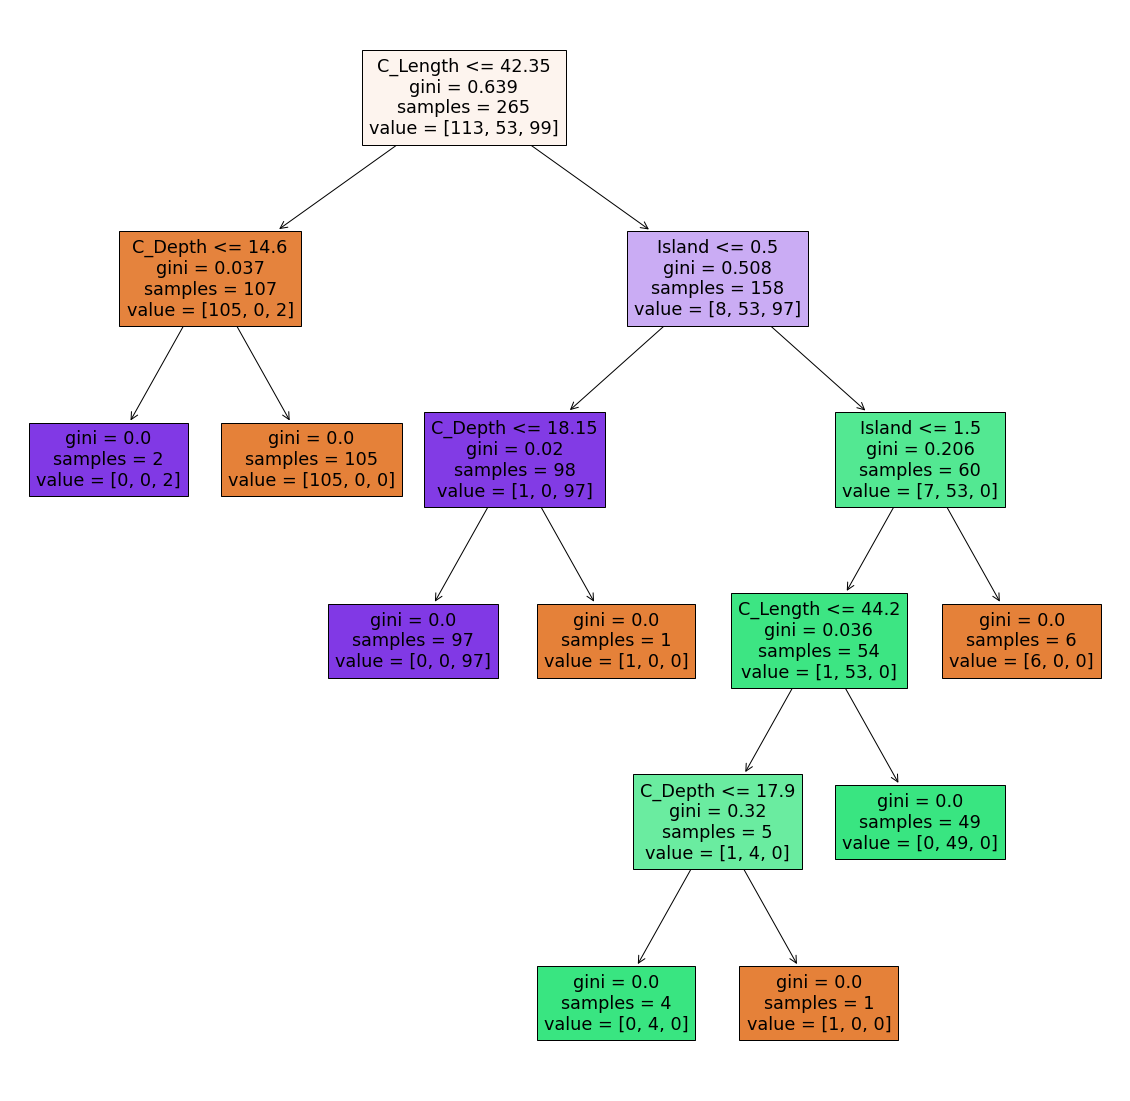

In [44]:
fig, ax = plt.subplots(1, figsize = (20, 20))
p = tree.plot_tree(T, filled = True, feature_names = X_test_select.columns)

__Explanation of tree__:The automated decision tree classifier has found the following rule to predict what species a penguin is. The tree first splits by Culmen Length (at a certain length), then by culmen depth or island, since it has learned during the training phase that these are the two other most important features for determing a species of a penguin. The orange boxes indicate the species is likely to be Adelie, the green boxes indicate the species is likely to be Chinstrap, and the purple boxes indicate the species is likely to be Gentoo. The label, "value" in each box represents the Species (Adelie, Chinstrap, and Gentoo), shown in that order from left to right in the array.

First, check whether Culmen Length <= 42.35 mm

- If so, next check whether the penguins culmen depth is less than or equal to 14.6 mm. If so, then the species is Gentoo with a high probability (2/2). Otherwise, the species is Adelie with high probability (105/105).
- If the culmen length is greater than 42.35 mm, then the tree checks the penguin is on the Island Biscoe. 
    - If so, it then checks if culmen depth is less than or equal to 18.15 mm. If so, then the penguin is Gentoo, otherwise it is an Adelie. 
    - Otherwise, it checks whether the island is Dream. Otherwise, the species is Adelie with high probability (6/6). 
        - If so, then the tree checks of culmen length is less than 44.2 mm and finally checks if culmen depth is less than 17.9 mm. If not, then the species is Chinstrap with high probaility (49/49). 
             
            

### Inspect Instances
Here we inspect few instances in which our trained model gave the wrong answer on the test set. Thus, we fit the model on the test set, as well as the training set.  

In [35]:
from sklearn.metrics import confusion_matrix
#test data mistakes
y_test_pred = T.predict(X_test_select)
c=confusion_matrix(y_test,y_test_pred)
c

array([[33,  0,  0],
       [ 2, 13,  0],
       [ 1,  0, 19]])

In [36]:
#training data mistakes
y_train_pred = T.predict(X_train_select)
c=confusion_matrix(y_train,y_train_pred)
c

array([[113,   0,   0],
       [  0,  53,   0],
       [  0,   0,  99]])

__Interpretation:__ The i, jth entry of this array gives the number of times that the model predicted species j when the species was in fact i. The large numbers on the diagonal means the model is usually right.

In [37]:
# use booolean indexing to extract all the incorrectly classified species 

#mask = mistake 
mask = y_test != y_test_pred
mistakes = X_test[mask]
mistake_labels = y_test[mask].to_numpy()
mistake_preds = y_test_pred[mask]
mistake_preds

array([0, 0, 0])

In [38]:
m_len = len(mistakes)
m_len

3

In [39]:
mistakes

,Island,Sex,C_Length,C_Depth,F_Length,Mass
182,1,0.0,40.9,16.6,187.0,3200.0
326,0,0.0,41.7,14.7,210.0,4700.0
216,1,0.0,43.5,18.1,202.0,3400.0


In [40]:
print(mistake_labels,mistake_preds)

species = {0:'Adelie', 1:'Chinstrap', 2: 'Gentoo'}

for i in range(m_len):
    print("The predicted species was " + species[mistake_preds[i]]+" but the true species was "+species[mistake_labels[i]])

[1 2 1] [0 0 0]
The predicted species was Adelie but the true species was Chinstrap
The predicted species was Adelie but the true species was Gentoo
The predicted species was Adelie but the true species was Chinstrap


In [41]:
penguins.groupby('Species').mean()

,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
Species,,,,,,,
Adelie,76.500000,38.791391,18.346358,189.953642,3700.662252,8.859733,-25.804194
Chinstrap,34.500000,48.833824,18.420588,195.823529,3733.088235,9.356155,-24.546542
Gentoo,62.056911,47.529508,14.976230,217.188525,5077.663934,8.247026,-26.185305


__Interpretation of results__: The model mostly confused Chinstrap and Adelie penguins. We think that this could be because of their similar culmen depths, which is one of the features of the model.

First, the model predicts a Chinstrap penguin as an Adelie penguin. Since culmen length was one of the features we selected, the confusion is probably because the penguin's culmen length was significantly lower than the mean culmen length of Chinstrap penguins. Its culmen length was 40.9 mm, which is much closer to the mean culmen length of Adelie penguins, 38.79 mm. It is important to note that the logistic model also made a mistake with this particular penguin's data, so perhaps it is just hard to predict.

Then, the model incorrectly predicts a Gentoo penguin as an Adelie penguin. This is also probably because of the relatively low culmen length of the penguin. Its culmen length is 41.7mm, much closer to the mean culmen length of Adelie penguins (38.79mm) than that of Gentoo penguins (47.53mm).

Then, the model again predicts a Chinstrap penguin as an Adelie penguin. Again, this is probably because of the relatively low culmen length of the penguin. Its culmen length is 43.5mm, which is closer to the mean culmen length of Adelie penguins (38.79mm) than that of Chinstrap penguins (48.83mm).

We associate the model's mistakes with confusing the Chinstrap and Adelie penguins mainly with the culmen length because their culmen depth means are very similar.

### Plot the decision regions

In [42]:
# Plot the decision regions of a classifer

def plot_regions(c,X,y,title):
    """
    Plot the decision regions of a classifer
    c: the Support vector classifiers 
    X: the preditor variables
       this function is for the penguins dataset
       uses columns culmen length /depth
    y: the target variables
    """
    x0=X['C_Length']
    x1=X['C_Depth']

    c.fit(X,y)
    
    #create a grid
    grid_x=np.linspace(x0.min(),x0.max(),501)
    grid_y=np.linspace(x1.min(),x1.max(),501)
    xx,yy=np.meshgrid(grid_x,grid_y) #has 501x501
    #xx[i,j]=i-th entry of x_grid
    #yy[i,j]-j-th entry of y_grid
    
    
    #machine learning algorithms want us to have a 1d array
    XX=xx.ravel()
    YY=yy.ravel()
    p=c.predict(np.c_[XX,YY])

    #now reshape p into a 2D array
    p=p.reshape(xx.shape)

    fig,ax=plt.subplots(1)
    #plot decision regions
    ax.contourf(xx,yy,p,cmap="jet",alpha=.2)

    #plot data
    ax.scatter(x0,x1,c=y,cmap="jet")
    
    ax.set(title = title, xlabel="Culmen Length (mm)",ylabel="Culmen Depth (mm)")

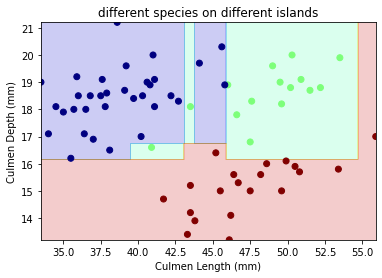

In [43]:
X_t=X_test_select[['C_Length', 'C_Depth']]
y = y_test
T= tree.DecisionTreeClassifier(max_depth=7)
plot_regions(T,X_t,y,"different species on different islands")

__Interpretation of results:__ The model seems to accurately predict most points, but some of the points are right at the boundary so they might be mistakes: the points that the model confused. The decision regions also seem relatively complex as the model creates regions to fit a single point.

## Support vector classifier 
Support Vector Machine (SVM) is a powerful and versatile Machine Learning model, capable of performing linear or nonlinear classification, regression, and even outlier detection. SVMs are particularly well suited for classification of complex small or medium-sized datasets. You can think of an SVM classifier as fitting the widest possible street between the classes.

### Feature Selection by Cross-validation
In this section, we use cross-validation to estimate the predictive performance of Support Vector Machine classifier. 

In [44]:
# use cross-validation to estimate the predictive performance of Support vector classifiers model.

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

def check_column_score(cols,deb=False):
    """
    Trains and evaluates SVM model via cross validation on the columns of the data 
    with selected indeces
    """
    SVM = svm.SVC()
    if deb:
        print("training with columns" + str(cols))
    
    return cross_val_score(SVM,X_train[cols],y_train,cv=5).mean()


In [45]:
# select the best feature combination.

def best_feature_selection(combos,deb=False):
    """
    select the best feature combination.
    Pararmeter:
    combos: list of the features.
    deb: boolean. control if you wanna print the candidate feature combinations.
    Return: list of the best combination of features.
    
    """
    best_score = -np.inf
    best_combo =[]
    for combo in combos:
        x=check_column_score(combo)
        if deb:
            print("CV score is "+ str(np.round(x,3)))
        if x > best_score:
            best_score= x
            best_combo = combo
    return best_combo

In [46]:
# apply best_feature_selection function to the candidate feature combinations and print out the result.

combos = [['Sex', 'C_Length', 'C_Depth'],
          ['Sex', 'Mass', 'F_Length'],
          ['Sex', 'F_Length', 'C_Length'],
          ['Island', 'C_Length','C_Depth'],
          ['Island', 'Mass', 'F_Length']]

print("The best feature selection is:", best_feature_selection(combos))


The best feature selection is: ['Island', 'C_Length', 'C_Depth']


### Estimate Optimal Model Complexity

when using SVMs you can apply an almost miraculous mathematical technique called the kernel trick, which makes it possible to get the same result as if you had added many polynomial features, even with very high-degree polynomials, without actually having to add them. 



In [47]:
def complexity_svm(N):
    """
    estimate optimal complexity of the model.
    Parameters: N. the maximum number of complexity.
    Return : a plot shows the training and test socore of different complexity.
             print out the complexity numbers, training scores, and the test scores.
    """
    #Creates an empty array of size N 
    cv=np.zeros(N)
    #Creates an array of size N with numbers in the range (1,N+1)
    depths=np.arange(1,N+1)
    
    for d in range(1, N):        
        #Creates the model 
        SVM = svm.SVC(kernel="poly", degree=d, coef0=1, C=5)
        #Fits the model to the training data 
        SVM.fit(X_train, y_train)
        #Sets each entry of the array to be the cross val score for the corresponding complexity
        cv[d-1]=cross_val_score(SVM,X_train[best_feature_selection(combos)],y_train,cv=5).mean()

    fig, ax = plt.subplots(1, figsize = (10, 7))
    
    #Creates a scatterplot of the cross val scores 
    ax.scatter(depths,cv,color="black",label="CV score")
    #Sets the label
    ax.set(xlabel = "Complexity (depth)", ylabel = "Performance (score)",ylim=(.73,1))
    ax.legend()
    print(list(zip(range(1,N),cv.round(3))))

[(1, 0.962), (2, 0.97), (3, 0.977), (4, 0.977), (5, 0.985), (6, 0.989), (7, 0.992), (8, 0.992), (9, 0.989), (10, 0.989), (11, 0.989), (12, 0.989), (13, 0.989), (14, 0.989), (15, 0.989), (16, 0.989), (17, 0.989), (18, 0.989), (19, 0.989)]


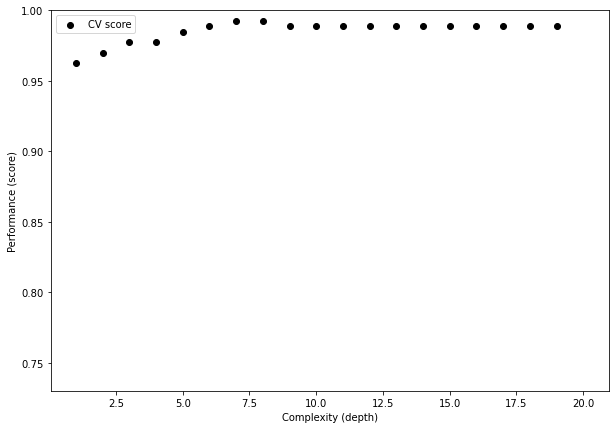

In [48]:
complexity_svm(20)

__Interpretation of Result:__ the degree of optimal complexity might be 7 because it has the highest train score.

In [49]:
# apply Gaussian RBF Kernel
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

def complexity_g(N):
    """
    estimate optimal complexity of the model.
    Parameters: N. the maximum number of complexity.
    Return : a plot shows the training and test socore of different complexity.
             print out the complexity numbers, training scores, and the test scores.
    """
    #Creates an empty array of size N 
    cv=np.zeros(N)
    #Creates an array of size N with numbers in the range (1,N+1)
    depths=np.arange(1,N+1)
    
    for d in range(1, N):        
        #Creates the model 
        SVM = Pipeline([("scaler", StandardScaler()),("svm_clf", SVC(kernel="rbf", gamma=d))])
        #Fits the model to the training data 
        SVM.fit(X_train, y_train)
        #Sets each entry of the array to be the cross val score for the corresponding complexity
        cv[d-1]=cross_val_score(SVM,X_train[best_feature_selection(combos)],y_train,cv=5).mean()

    fig, ax = plt.subplots(1, figsize = (10, 7))
    
    #Creates a scatterplot of the cross val scores 
    ax.scatter(depths,cv,color="black",label="CV score")
    #Sets the label
    ax.set(xlabel = "Complexity (depth)", ylabel = "Performance (score)",ylim=(.73,1))
    ax.legend()
    print(list(zip(range(1,N),cv.round(3))))

[(1, 0.974), (2, 0.981), (3, 0.981), (4, 0.985), (5, 0.981), (6, 0.977), (7, 0.977), (8, 0.977), (9, 0.97), (10, 0.97), (11, 0.966), (12, 0.966), (13, 0.966), (14, 0.962), (15, 0.958), (16, 0.958), (17, 0.955), (18, 0.947), (19, 0.943)]


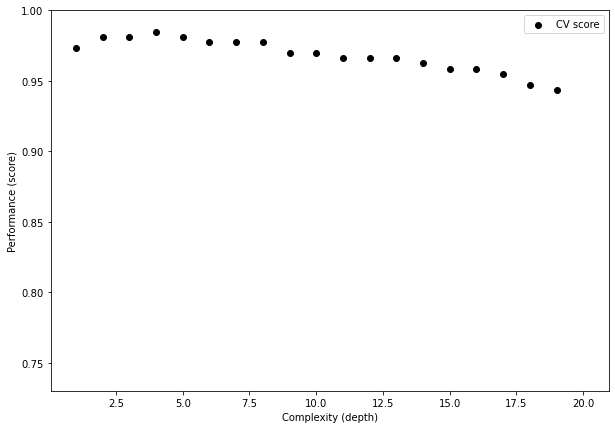

In [50]:
complexity_g(20)

__Interpretation of Result:__ the degree of optimal complexity might be 1 because it has the highest train score.

### Evaluate model on the test set.

Now that we have a reasonable estimate of the best feature selection and the optimal depth, In this section, we will evaluate against the unseen testing data. 

If our model is overfitting, we might want to reduce the polynomial degree. Conversely, if it is underfitting, we can try increasing it. 


In [51]:
# apply Gaussian RBF Kernel method

best_feature_selection(combos)
X_train_select = X_train[best_feature_selection(combos)]
X_test_select = X_test[best_feature_selection(combos)]
SVM = Pipeline([("scaler", StandardScaler()),("svm_clf", SVC(kernel="rbf", gamma=1))])
SVM.fit(X_train_select, y_train)
SVM.score(X_train_select,y_train),SVM.score(X_test_select,y_test)

(1.0, 0.9852941176470589)

In [52]:
# apply the polynomial features method

best_feature_selection(combos)
X_train_select = X_train[best_feature_selection(combos)]
X_test_select = X_test[best_feature_selection(combos)]
SVM = svm.SVC(kernel="poly", degree=7, coef0=1, C=5)
SVM.fit(X_train_select, y_train)
svm_train = SVM.score(X_train_select,y_train)
svm_test = SVM.score(X_test_select,y_test)
print("The accuracy for the training set is " + str(svm_train) + " and that for the testing set is " +str(svm_test))

The accuracy for the training set is 1.0 and that for the testing set is 0.9852941176470589


__Interpretation of the result:__ when we use the best feature selection combination ['Island', 'C_Length', 'C_Depth'] and estimated optimal complexity of each method, we can see the polynomial features method got the higher score on train set and the smaller difference between train socre and test score. We will use polynomial method as our model.

### Inspect Instances
Here we inspect few instances in which our trained model gave the wrong answer on the test set. 

In [53]:
from sklearn.metrics import confusion_matrix
#test data mistakes
y_test_pred = SVM.predict(X_test_select)
c=confusion_matrix(y_test,y_test_pred)
c

array([[33,  0,  0],
       [ 1, 14,  0],
       [ 0,  0, 20]])

In [54]:
#training data mistakes
y_train_pred = SVM.predict(X_train_select)
c=confusion_matrix(y_train,y_train_pred)
c

array([[113,   0,   0],
       [  0,  53,   0],
       [  0,   0,  99]])

In [55]:
# use booolean indexing to extract all the incorrectly classified species 

#mask = mistake 
mask = y_test != y_test_pred
mistakes = X_test[mask]
mistake_labels = y_test[mask].to_numpy()
mistake_preds = y_test_pred[mask]
mistake_preds

array([0])

In [56]:
m_len = len(mistakes)
m_len

1

In [57]:
print(mistake_labels,mistake_preds)

species = {0:'Adelie', 1:'Chinstrap', 2: 'Gentoo'}

for i in range(m_len):
    print("The predicted species was " + species[mistake_preds[i]]+" but the true species was "+species[mistake_labels[i]])

[1] [0]
The predicted species was Adelie but the true species was Chinstrap


In [58]:
penguins.groupby('Species').mean()

,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
Species,,,,,,,
Adelie,76.500000,38.791391,18.346358,189.953642,3700.662252,8.859733,-25.804194
Chinstrap,34.500000,48.833824,18.420588,195.823529,3733.088235,9.356155,-24.546542
Gentoo,62.056911,47.529508,14.976230,217.188525,5077.663934,8.247026,-26.185305


Again, we see that the SVM model also confused the same penguin as the logistic model and the decision tree. As mentioned earlier, this is because of the relatively low culmen length of this particular penguin and, in general, because of how similar the culmen depths are of the Adelie and Chinstrap penguins.

### Plot the decision regions

In [59]:
# Plot the decision regions of a classifer

def plot_regions(c,X,y,title):
    """
    Plot the decision regions of a classifer
    c: the Support vector classifiers 
    X: the preditor variables
       this function is for the penguins dataset
       uses columns culmen length /depth
    y: the target variables
    """
    x0=X['C_Length']
    x1=X['C_Depth']

    c.fit(X,y)
    
    #create a grid
    grid_x=np.linspace(x0.min(),x0.max(),501)
    grid_y=np.linspace(x1.min(),x1.max(),501)
    xx,yy=np.meshgrid(grid_x,grid_y) #has 501x501
    #xx[i,j]=i-th entry of x_grid
    #yy[i,j]-j-th entry of y_grid
    
    
    #machine learning algorithms want us to have a 1d array
    XX=xx.ravel()
    YY=yy.ravel()
    p=c.predict(np.c_[XX,YY])

    #now reshape p into a 2D array
    p=p.reshape(xx.shape)

    fig,ax=plt.subplots(1)
    #plot decision regions
    ax.contourf(xx,yy,p,cmap="jet",alpha=.2)

    #plot data
    ax.scatter(x0,x1,c=y,cmap="jet")
    
    ax.set(title = title, xlabel="Culmen Length (mm)",ylabel="Culmen Depth (mm)")

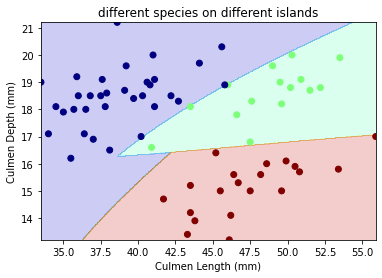

In [60]:
X_t=X_test_select[['C_Length', 'C_Depth']]
y = y_test
SVM = svm.SVC(kernel="poly", degree=7, coef0=1, C=5)
plot_regions(SVM,X_t,y,"different species on different islands")

__Interpretation of results__: Even though some of the points are on the border, the model managed to predict them accurately.

There's only one species on the island Torgersen.


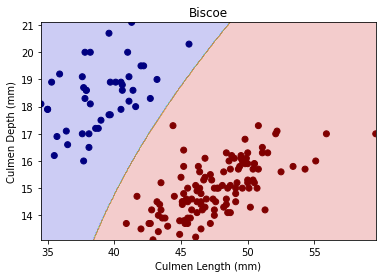

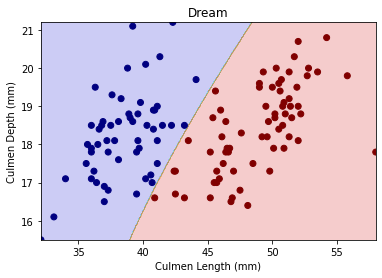

In [61]:
# apply the function to plot based on the Island predictor variable.
# if there's only one species on the island, raise an error.

X,y = prep_penguins_data(penguins)
islands = {0:'Biscoe', 1:'Dream', 2: 'Torgersen'}
SVM = svm.SVC(kernel="poly", degree=7, coef0=1, C=5)
for i in range(3):
    X_t=X[X.Island == i]
    X_t=X_t[['C_Length', 'C_Depth']]
    y_t=y[X.Island == i]
    if len(y_t[X.Island == i].unique()) > 1:
        plot_regions(SVM,X_t,y_t,islands[i])
    #This is the case where there is only one species on the island 
    else:
        print("There's only one species on the island " + islands[i] + ".")

__Interpretation of Results:__ We see that the model predicted a red dot as being a blue dot incorrectly. This was probably because it was very close to the border.

# Discussion

In this section, we reflect on our findings. We discuss: the performance of our models, which combination of model and measurements we recommend, how the model could be improved if more or different data were available, and the possible dangers associated with interpreting or using the model.

### Performance of each model on unseen data:

In [78]:
# We look at the accuracies of our different models.
# initialize list of lists 
data = [['Multinomial Logistic Regression', LR_test], ['Decision Tree', tree_test], ['Support Vector Classifier', svm_test]] 
  
# Create a data frame containing the models' accuracies
accuracies = pd.DataFrame(data, columns = ['Model', 'Accuracy']) 
accuracies

,Model,Accuracy
0,Multinomial Logistic Regression,0.970588
1,Decision Tree,0.955882
2,Support Vector Classifier,0.985294


We see that the Support Vector classifier model had the highest accuracy out of all the models. It had only one mistake. Even though the multinomial regression model also had only one mistake, it took much longer to run. On the other hand, the SVM model took less time and its decision regions are not very complex either. The decision regions are separate and there are no small regions. Thus, we think that the SVM model is the best.

### Which combination of model & measurements we recommend:
Based on our results, we recommend the SVM model, using the predictor variables, [Culmen Length, Culmen Depth, and Island], which performed the best in predicting a penguin's species at the fastest speed.

### How the model could be improved if more or different data were avaliable:

Our model could be improved if we had more data, in which case we could use a larger proportion of the data as the testing set to see if our accuracy is still that high. More data would reduce the generalization error. The accuracy of the model can be improved.  Specifically to SVM, the model is largely affected by the points near the margin, and so we could work with data using more features. In addition, an online model can be trained and launched into production while it keeps learning as new data comes in. 

Furthermore, if different data were available, we might prefer that these different coming data doesn't full of errors, outliers, and noise (e.g., due to poor quality measurements), or it will make it harder for the model to detect the underlying patterns, so your system is less likely to perform well. Also, the use of kernel, methods in SVM allows it to be a model that would adapt to different types of data. 

### Possible dangers associated with interpreting or using the model:

In machine learning, some algorithms are referred to as black-box processes because the mechanism that transforms the input into the output is obfuscated by an imaginary box, without interference from the audience. In other words, the interpretation of the model is affected becayse we don't know its mechanisms and don't know how it is making the predictions, leading us to interpret the results in an incorrect manner. 

In contrast, Decision Trees are intuitive, and their decisions are easy to interpret. SVM is generally considered a black-box model. It makes great predictions, and you can easily check the calculations that they performed to make these predictions; nevertheless, it is usually hard to explain in simple terms why the predictions were made. For example, if a SVM model says that a particular species of penguin appears on an island and having a certain culmen length, it is hard to know what contributed to this prediction: what did the model recognize? Therefore, we might make a wrong interpretation of the model and its outcome.

The other possible danger of implementing the model includes generalizing to a much larger data set or applying the conclusions to penguins from another area because our penguins' home lies along the Palmer Archipelago. 
